### Customer Segmentation with K-Means Clustering

- In this example, I aim to create a Segmentation with customers who behave the same

- Investigate what are the common traits / behaviours in each Segment / Cluster

- Deploy our results in Power BI for the business to use

- Automate all this process for future data


### Importing / Installing packages

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.cluster import KMeans, k_means

%matplotlib inline
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
sns.set(rc={'figure.figsize':(8,6)})


## Loading the Raw Data into Python

In [2]:

customer_seg = pd.read_csv('data/Events Raw Data.csv')
print(customer_seg.shape)
customer_seg.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


### Data Preprocessing

###  Exploratory Data Analysis & Data Cleaning


In [3]:
# Checking for null values

customer_seg.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [4]:
# Visualize the NULL observations


customer_seg['Total_Household_Income'].isnull()



0        False
1        False
2        False
3        False
4        False
         ...  
14778    False
14779    False
14780    False
14781    False
14782    False
Name: Total_Household_Income, Length: 14783, dtype: bool

In [5]:
# Deleting the NULL values
customer_seg = customer_seg.dropna(subset = ['Total_Household_Income'])

# Printing the shape
print(customer_seg.shape)

# Visualize the NULL observations
customer_seg.isnull().sum()

(14778, 19)


CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [6]:
# Investigate all the elements whithin each Feature 

for column in customer_seg:
    unique_vals = np.unique(customer_seg[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature Current_Status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How often you attend Entertaining events in a year? :

In [7]:
# Getting the columns we need

customer_seg.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

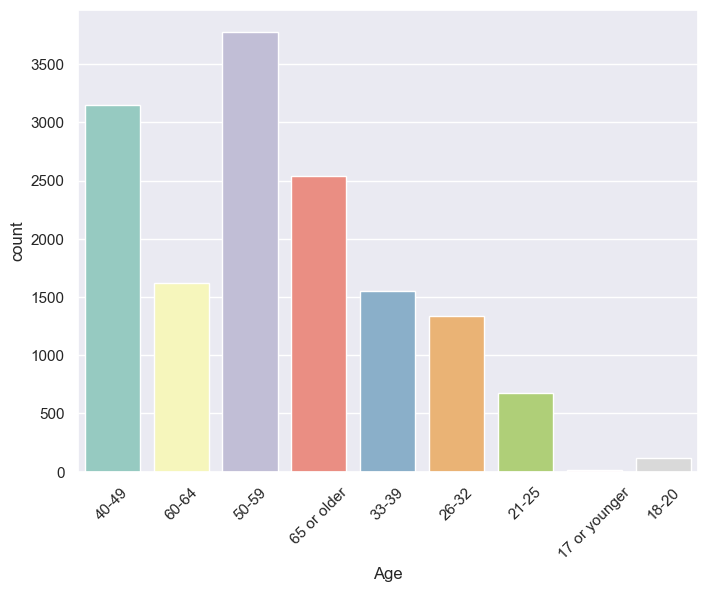

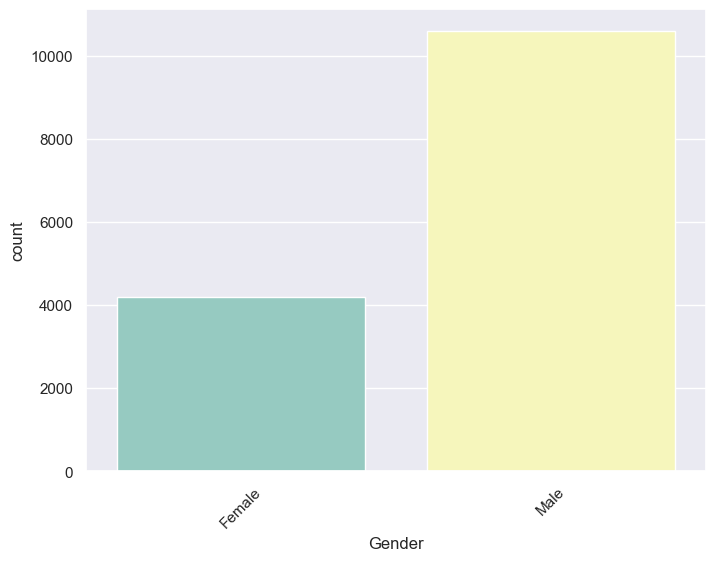

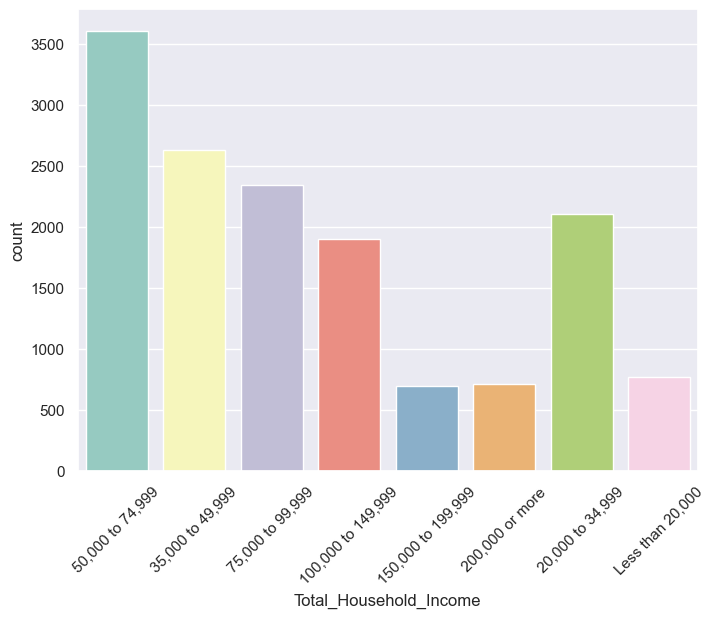

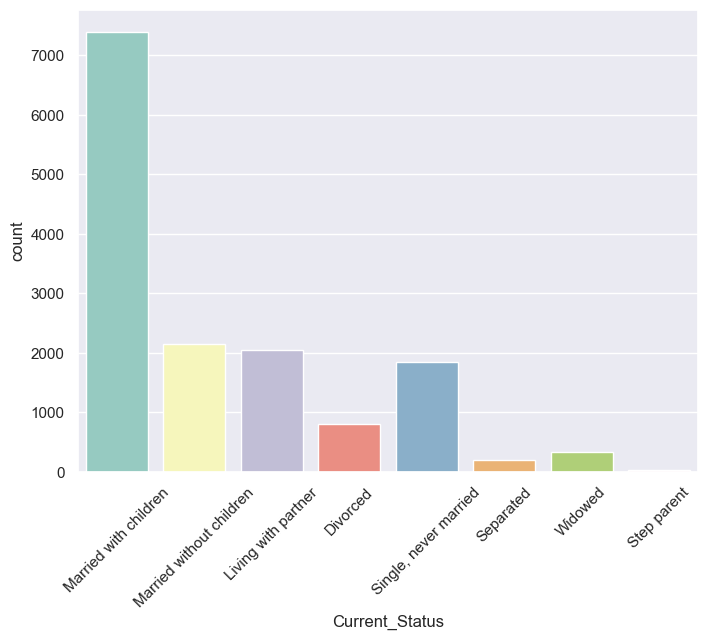

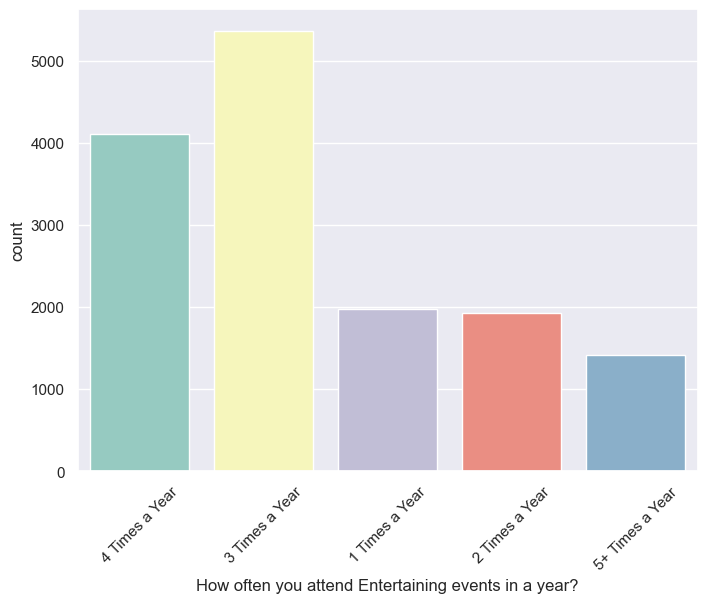

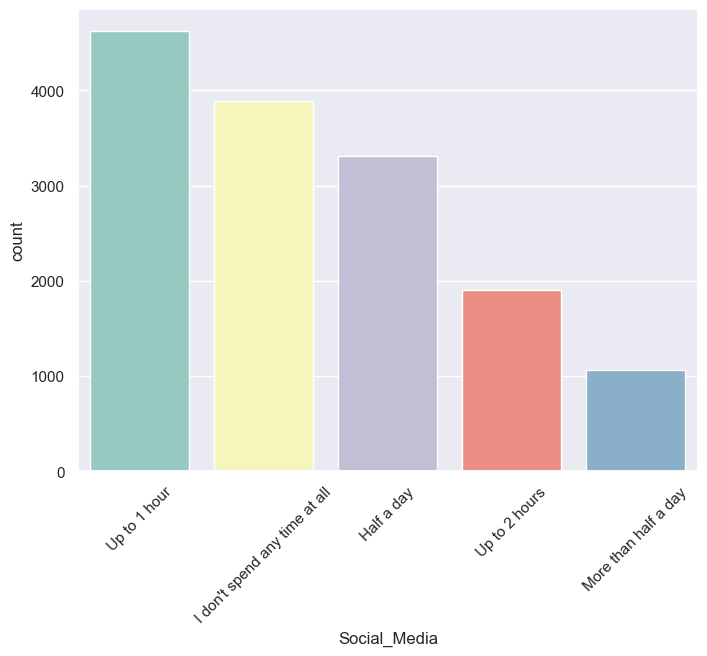

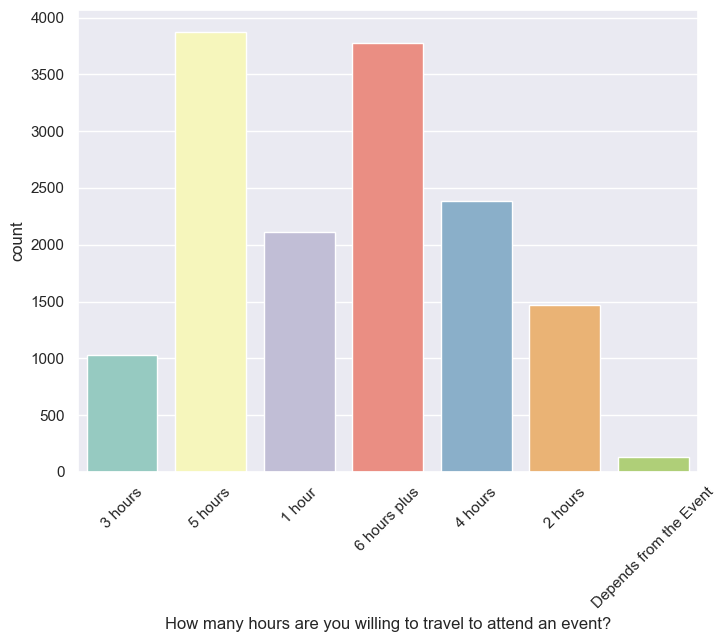

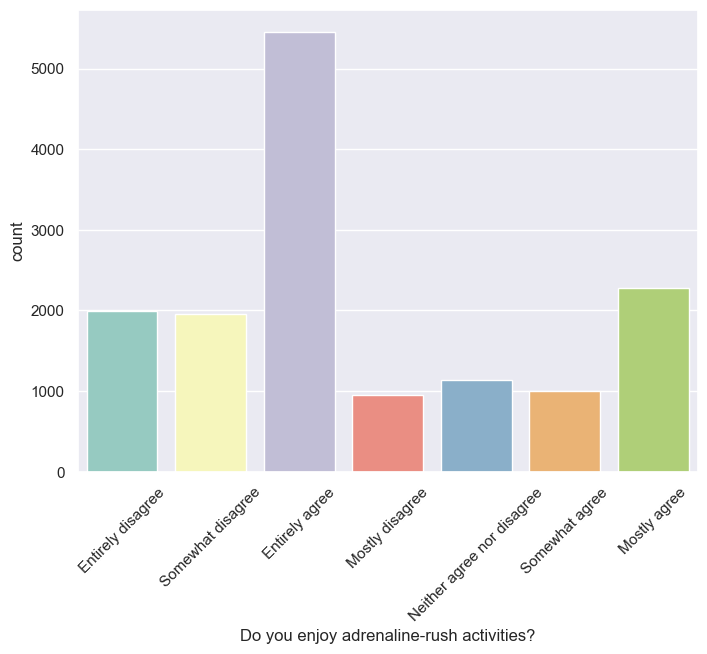

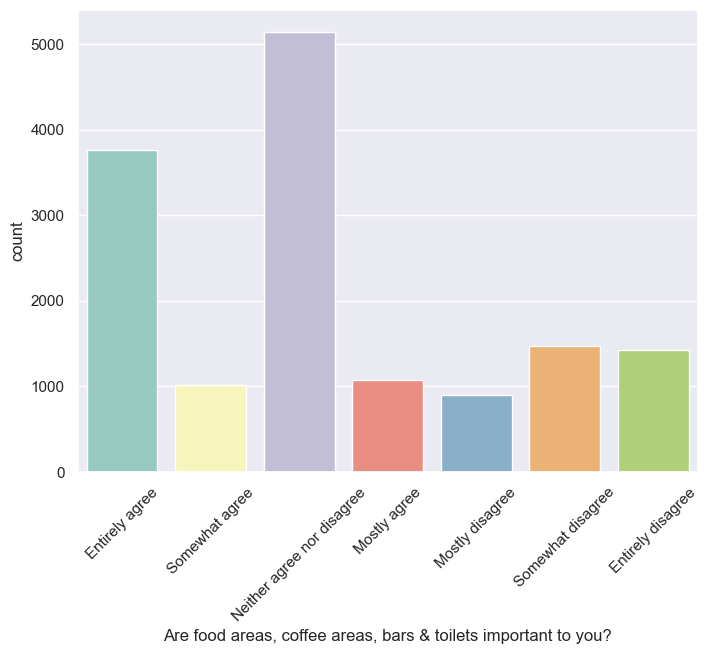

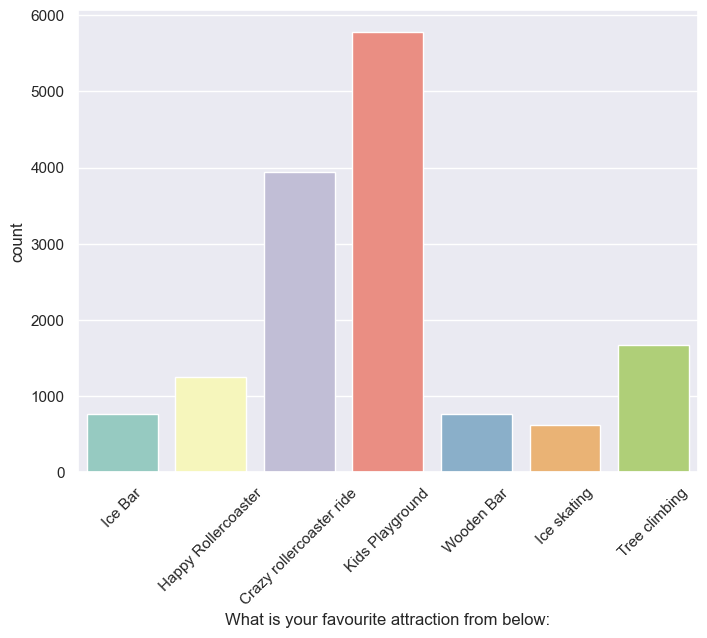

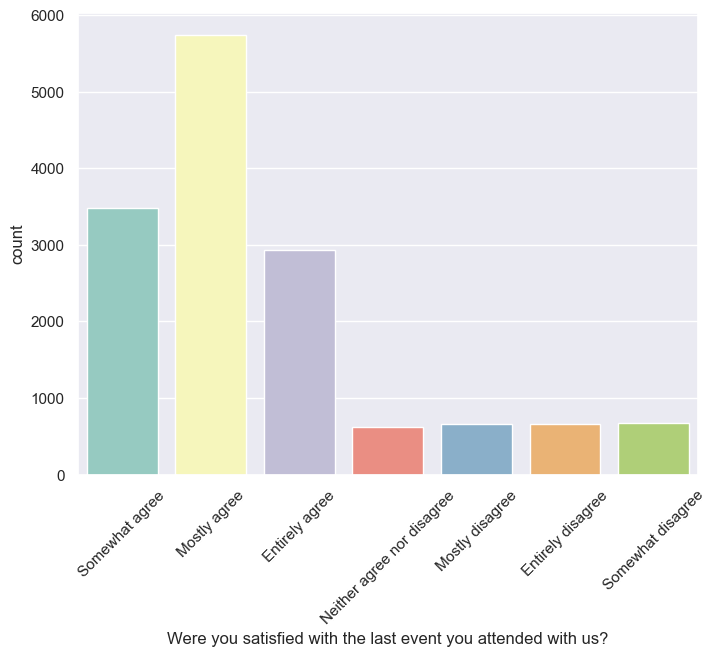

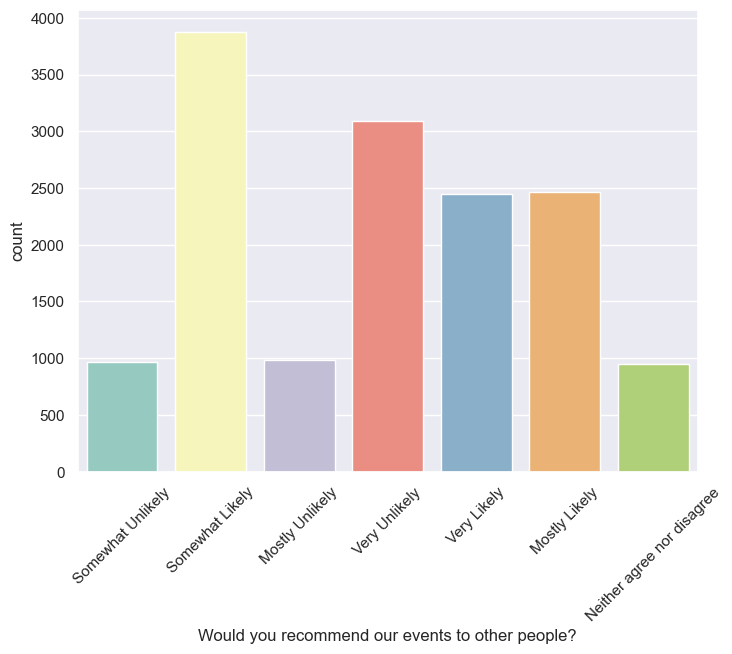

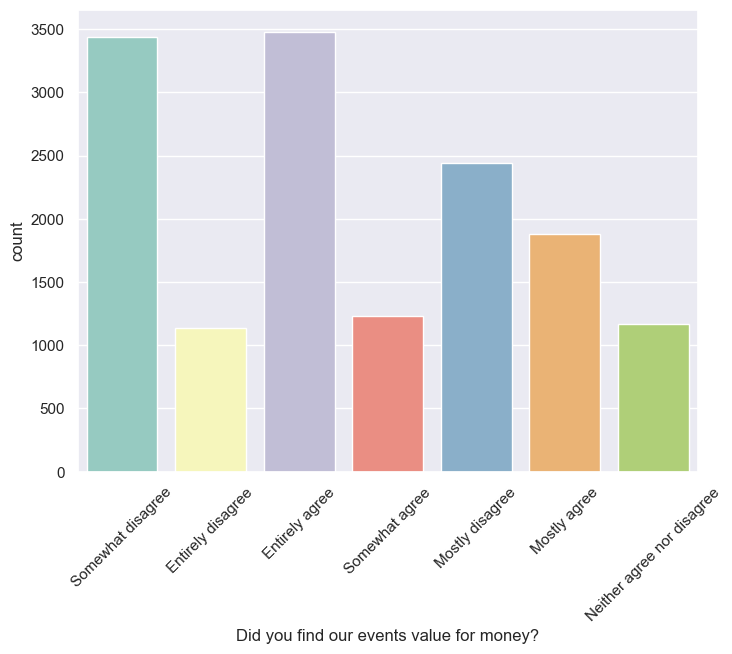

In [8]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Age', 'Gender','Total_Household_Income','Current_Status',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = customer_seg, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    


###  Feature Engineering - Numeric Representation

In [9]:
# Making categorical variables into numeric representation

print(customer_seg.shape)

# keeping the columns we need 
customer_seg2 = customer_seg[features]
print(customer_seg2.shape)

# Making categorical variables into numeric representation
new_customer_seg = pd.get_dummies(customer_seg2, columns = features)


print(new_customer_seg.shape)
# print the shape

new_customer_seg.head()



(14778, 19)
(14778, 13)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [10]:
new_customer_seg.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male',
       'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend 

##  K-means Clustering

In [11]:
# Running Kmeans

X_train = new_customer_seg.values

# It is jus a random number to start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)


The clusters are:  [0 4 4 ... 0 1 4]
The Inertia is:  101900.29058795146


In [12]:
kmeans.labels_.shape

(14778,)

every customer has one clusters and that is what it is equvalent to number of row data.

#### What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [13]:
# Running K means with multible Ks

no_of_clusters = range(2,20) 
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)




The innertia for : 2 Clusters is: 125619.02972065729
The innertia for : 3 Clusters is: 114905.386842667
The innertia for : 4 Clusters is: 106337.17594801629
The innertia for : 5 Clusters is: 100865.16529237546
The innertia for : 6 Clusters is: 96432.6152774354
The innertia for : 7 Clusters is: 93814.47396613643
The innertia for : 8 Clusters is: 91696.63733522172
The innertia for : 9 Clusters is: 89725.0022208335
The innertia for : 10 Clusters is: 88489.62163882007
The innertia for : 11 Clusters is: 87575.78566142358
The innertia for : 12 Clusters is: 86617.62360727935
The innertia for : 13 Clusters is: 85829.36826983487
The innertia for : 14 Clusters is: 85014.77874076128
The innertia for : 15 Clusters is: 84405.01018447903
The innertia for : 16 Clusters is: 83703.0296756296
The innertia for : 17 Clusters is: 82982.58857430407
The innertia for : 18 Clusters is: 82595.5655230248
The innertia for : 19 Clusters is: 81967.35418738451


As you can see above as the number of clusters increaes the innertia decreases. So how do we choose the best number of clusters?

Text(0.5, 1.0, 'Inertia Plot per k')

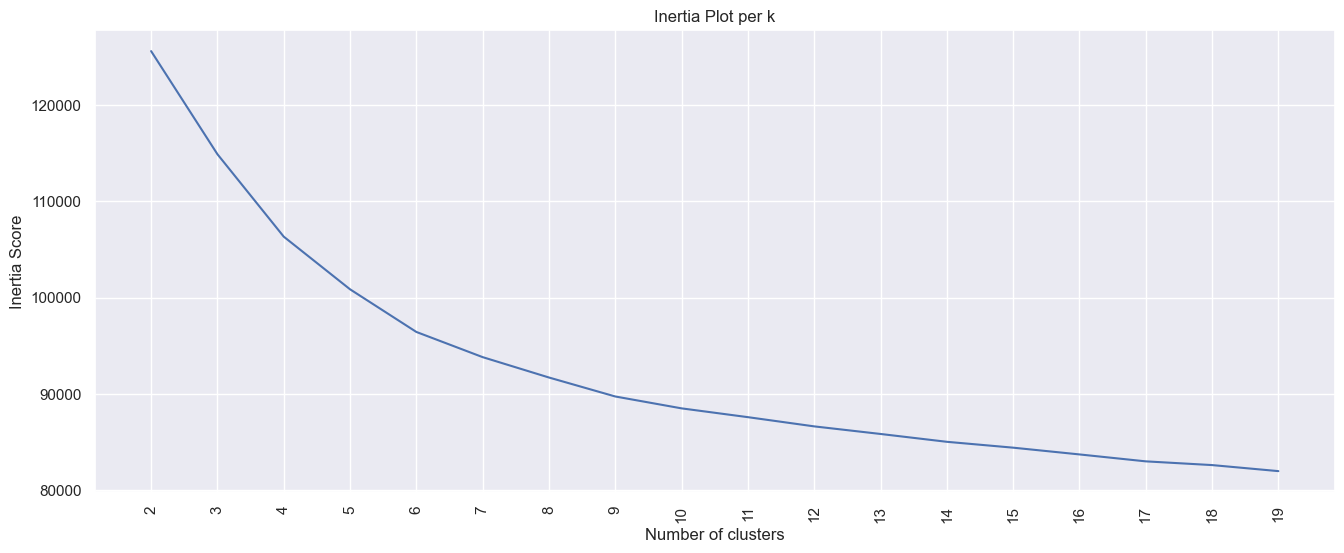

In [14]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [15]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987


In [16]:
kmeans.labels_

array([2, 2, 2, ..., 2, 0, 2], dtype=int32)

In [17]:
predictions

array([2, 2, 2, ..., 2, 0, 2], dtype=int32)

###  Running Principal Component Analysis (PCA) to Visualize & Improve Results


At the beggining we only choose two components.

Explained variance ratio (first two components): [0.167356 0.078177]


<Figure size 800x600 with 0 Axes>

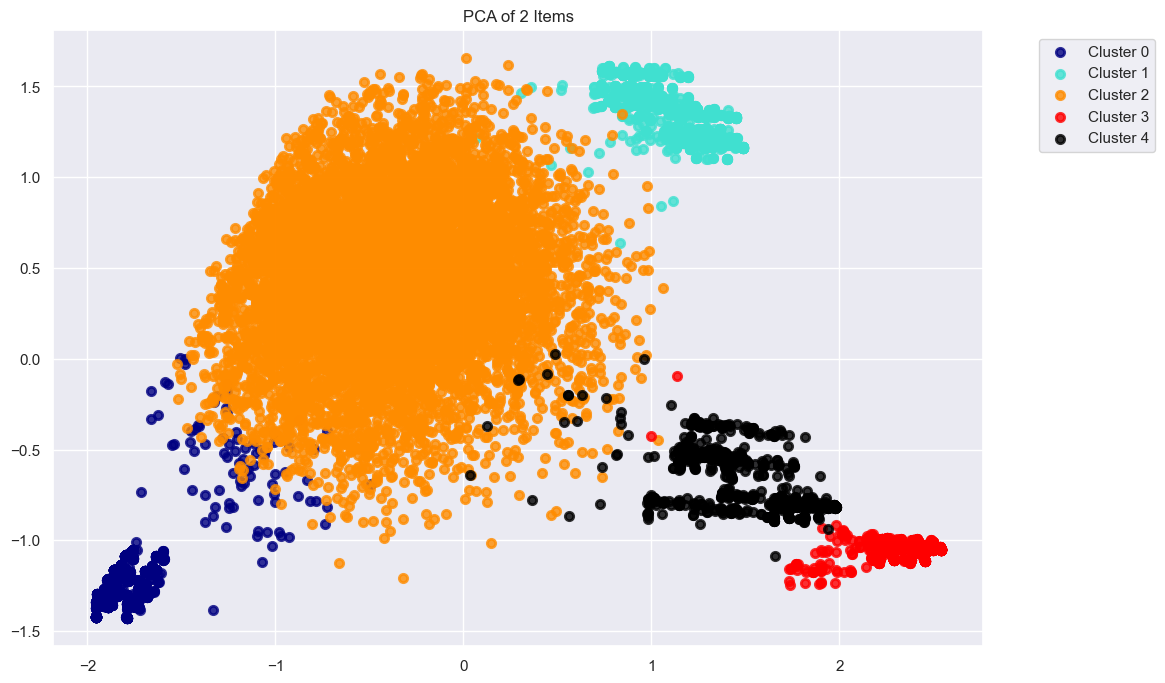

In [18]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

The graph above is not actulaly representing the qualty of our results. This garph consists of of 2 pricipal components and explains only the 25% of the variance of the data set.

###  Identifying the Best Number of Components


Total Variance in our dataset is:  9.789277508428576
The 95% variance we want to have is:  9.299813633007147

Variance explain with 30 n_compononets:  7.800063287617354
Variance explain with 35 n_compononets:  8.20005994422213
Variance explain with 40 n_compononets:  8.559358189926296
Variance explain with 41 n_compononets:  8.625206072416162
Variance explain with 50 n_compononets:  9.157222065601205
Variance explain with 53 n_compononets:  9.301801997586805
Variance explain with 55 n_compononets:  9.391528190593444
Variance explain with 60 n_compononets:  9.592274980903571


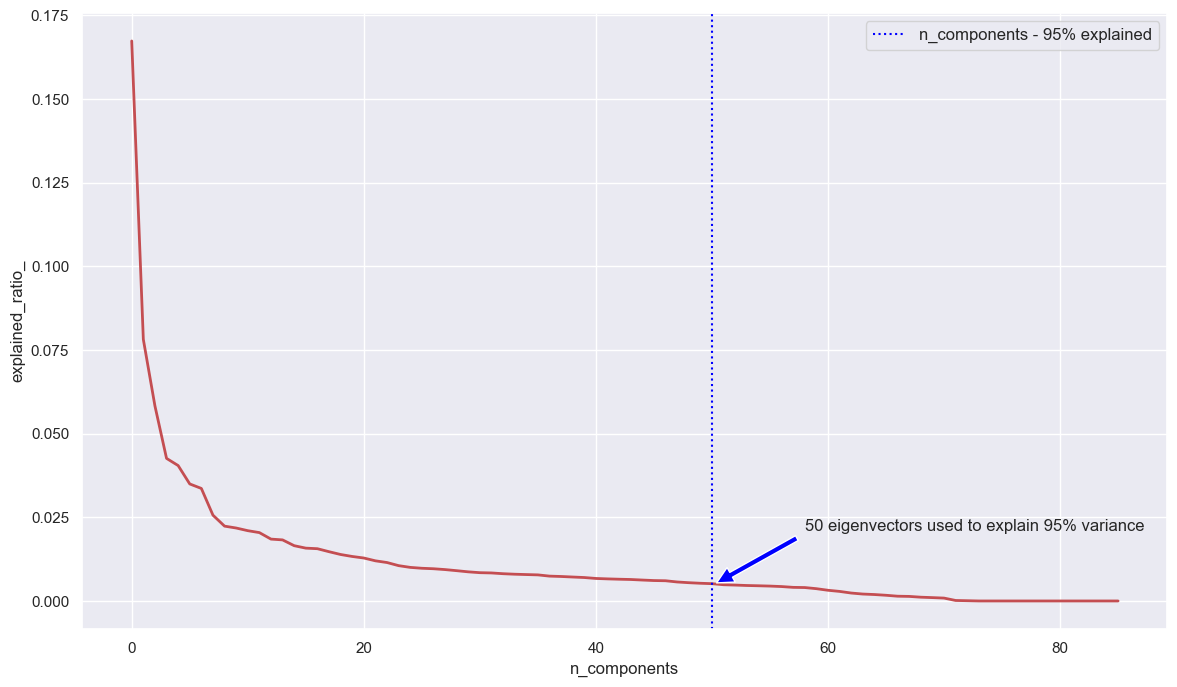

In [19]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(50,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('50 eigenvectors used to explain 95% variance', xy=(50, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()



Above I tried to find the best number of compononets that hits 95% variance we want to have is:  7.847272584557045. Therefore I chose Variance explain with 50 n_compononets:  8.116115160210802.

I would like to re-run the PCA using 50 principal component and re-run K-means just see if we have managed the improve our result. 

The innertia for : 2 Clusters is: 116270.74506238161
The innertia for : 3 Clusters is: 105831.39007569017
The innertia for : 4 Clusters is: 97004.79536077424
The innertia for : 5 Clusters is: 91542.25887588885
The innertia for : 6 Clusters is: 87116.6129278577
The innertia for : 7 Clusters is: 84499.21958672524
The innertia for : 8 Clusters is: 82275.79422646186
The innertia for : 9 Clusters is: 80708.99458472789
The innertia for : 10 Clusters is: 79307.51050934929
The innertia for : 11 Clusters is: 78343.14204590576
The innertia for : 12 Clusters is: 77432.33258721813
The innertia for : 13 Clusters is: 76594.85769703236
The innertia for : 14 Clusters is: 75876.18851355344
The innertia for : 15 Clusters is: 74979.52606302568
The innertia for : 16 Clusters is: 74252.96208078493
The innertia for : 17 Clusters is: 73607.36078754536
The innertia for : 18 Clusters is: 73184.6827649505
The innertia for : 19 Clusters is: 72523.2331416211


Text(0.5, 1.0, 'Inertia Plot per k')

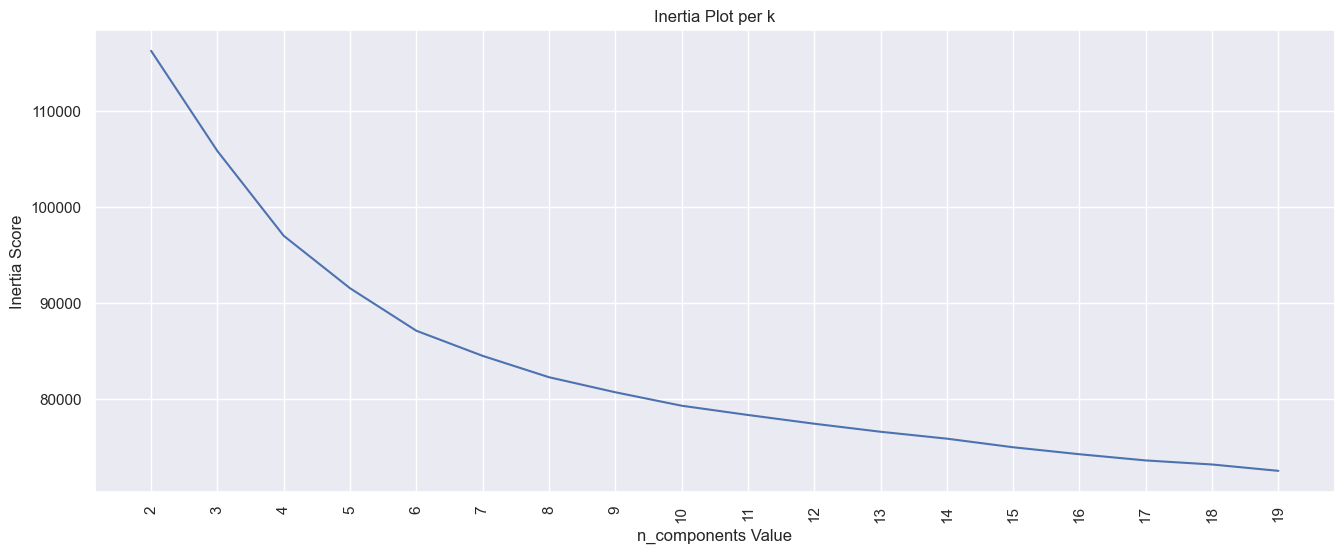

In [20]:
# Running PCA again

pca = PCA(n_components=50, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

When I compare the result that I had with 2 components with the above you see that the result has improved. I have lower innertia here after running PCA.

#### How to improve the results?

I combined different variables actually make sense. When I did the explonatory data analysis from the graphs you see that we can I actually combine the similiar group. Below I combined the groups.

In [21]:
# Visualizing all of your variables / columns
new_customer_seg.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male',
       'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend 

In [22]:
print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 86)


In [23]:
# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column
# 1-2 times
#two varibales one  / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
# two variables one / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(# two varibales one / columns
new_customer_seg['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |     (new_customer_seg['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/2253311219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(# two varibales one / columns


In [24]:
# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column
# 1-2 times
#two varibales one  / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
# two variables one / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(# two varibales one / columns
new_customer_seg['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |     (new_customer_seg['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/2253311219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(# two varibales one / columns


In [25]:
#4-5 times

#two varibales one  / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_3_or_4_times'] = 0
# two variables one / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_3_or_4_times'][(# two varibales one / columns
new_customer_seg['How often you attend Entertaining events in a year?_3 Times a Year'] == 1) |     (new_customer_seg['How often you attend Entertaining events in a year?_4 Times a Year'] == 1)] = 1
print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 88)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/1006343681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_3_or_4_times'][(# two varibales one / columns


In [26]:
# Cleaning the "social_media" column

# half a day + more than half a day

#two varibales one  / columns
new_customer_seg['social_media_half_day_or_more_than_half_day'] = 0
# two variables one / columns
new_customer_seg['social_media_half_day_or_more_than_half_day'][(# two varibales one / columns
new_customer_seg['Social_Media_Half a day'] == 1) |     (new_customer_seg['Social_Media_More than half a day'] == 1)] = 1
print("The shape is: ", new_customer_seg.shape)


The shape is:  (14778, 89)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/3650936789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['social_media_half_day_or_more_than_half_day'][(# two varibales one / columns


In [27]:
# Cleaning the "how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column

In [28]:
# 1 to 2 hours
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_1_to 2_hours'] = 0
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_1_to 2_hours'][(new_customer_seg['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | (new_customer_seg['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1

# 3 to 4 hours
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_3_to_4_hours'] = 0
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_3_to_4_hours'][(new_customer_seg['How many hours are you willing to travel to attend an event?_3 hours'] == 1) | (new_customer_seg['How many hours are you willing to travel to attend an event?_4 hours'] == 1)] = 1

# 5 to 6 hours
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'][(new_customer_seg['How many hours are you willing to travel to attend an event?_5 hours'] == 1) | (new_customer_seg['How many hours are you willing to travel to attend an event?_6 hours plus'] == 1)] = 1

print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 92)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/388585153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_1_to 2_hours'][(new_customer_seg['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | (new_customer_seg['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1
/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/388585153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_3_to_

In [29]:
# Cleaning the "do_you_enjoy_adrenaline_rush_activities" column

In [30]:

# Mostly & Somewhat Agree
new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Agree'] = 0
new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Agree'][(new_customer_seg['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | (new_customer_seg['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1)] = 1

# Mostly & Somewhat Disagree
new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Disagree'] = 0
new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Disagree'][(new_customer_seg['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1) | (new_customer_seg['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1)] = 1

print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 94)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/1321669203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Agree'][(new_customer_seg['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | (new_customer_seg['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1)] = 1
/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/1321669203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Disagree'][(new_customer_seg['Do you enjoy

In [31]:
# Cleaning the "are_food_areas_coffee_areas_bars_toilets_important_to_you" column

In [32]:
# Mostly & Somewhat Agree
new_customer_seg['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_Agree'] = 0
new_customer_seg['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_Agree'][(new_customer_seg['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (new_customer_seg['Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree'] == 1)] = 1


# Mostly & Somewhat & entirely Disagree
new_customer_seg['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_entirely_Disagree'] = 0
new_customer_seg['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_entirely_Disagree'][(new_customer_seg['Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree'] == 1) | (new_customer_seg['Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree'] == 1) | (new_customer_seg['Did you find our events value for money?_Entirely disagree'] == 1)] = 1

print("The shape is: ", new_customer_seg.shape)



The shape is:  (14778, 96)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/2367166460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_Agree'][(new_customer_seg['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (new_customer_seg['Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree'] == 1)] = 1
/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/2367166460.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['are_food_areas_coffee_areas_bars_toilet

In [33]:
# Cleaning the "were_you_satisfied_with_the_last_event_you_attended_with_us" column

In [34]:
# Entirely & Mostly & Somewhat & Neither Disagree
new_customer_seg['were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely_Mostly_Somewhat_Neither_Disagree'] = 0
new_customer_seg['were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely_Mostly_Somewhat_Neither_Disagree'][(new_customer_seg['Were you satisfied with the last event you attended with us?_Entirely disagree'] == 1) | (new_customer_seg['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | (new_customer_seg['Were you satisfied with the last event you attended with us?_Neither agree nor disagree'] == 1) | (new_customer_seg['Were you satisfied with the last event you attended with us?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 97)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/2655692467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely_Mostly_Somewhat_Neither_Disagree'][(new_customer_seg['Were you satisfied with the last event you attended with us?_Entirely disagree'] == 1) | (new_customer_seg['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | (new_customer_seg['Were you satisfied with the last event you attended with us?_Neither agree nor disagree'] == 1) | (new_customer_seg['Were you satisfied with the last event you attended with us?_Somewhat disagree'] == 1)] = 1


In [35]:
# Cleaning the "would_you_recommend_our_events_to_other_people" colum
new_customer_seg['would_you_recommend_our_events_to_other_people_Mostly_Somewhat_Neither_Unlikely'] = 0
new_customer_seg['would_you_recommend_our_events_to_other_people_Mostly_Somewhat_Neither_Unlikely'][(new_customer_seg['Would you recommend our events to other people?_Mostly Unlikely'] == 1) | (new_customer_seg['Would you recommend our events to other people?_Neither agree nor disagree'] == 1) | (new_customer_seg['Did you find our events value for money?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 98)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/3114799053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['would_you_recommend_our_events_to_other_people_Mostly_Somewhat_Neither_Unlikely'][(new_customer_seg['Would you recommend our events to other people?_Mostly Unlikely'] == 1) | (new_customer_seg['Would you recommend our events to other people?_Neither agree nor disagree'] == 1) | (new_customer_seg['Did you find our events value for money?_Somewhat disagree'] == 1)] = 1


In [36]:
# Cleaning the "did_you_find_our_events_value_for_money" column
new_customer_seg['did_you_find_our_events_value_for_money_Mostly_Somewhat_agree'] = 0
new_customer_seg['did_you_find_our_events_value_for_money_Mostly_Somewhat_agree'][(new_customer_seg['Did you find our events value for money?_Mostly agree'] == 1)  | (new_customer_seg['Did you find our events value for money?_Somewhat agree'] == 1)] = 1

print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 99)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_1329/1272345653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['did_you_find_our_events_value_for_money_Mostly_Somewhat_agree'][(new_customer_seg['Did you find our events value for money?_Mostly agree'] == 1)  | (new_customer_seg['Did you find our events value for money?_Somewhat agree'] == 1)] = 1


In [37]:
new_customer_seg.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male',
       'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend 

In [38]:
# Replacing apostrophe from columns names
new_customer_seg.columns = new_customer_seg.columns.str.replace("'","")

# Excluding the fields we have merged together
new_features = ['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       #'how_often_you_attend_entertaining_events_in_a_year_1 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_2 Times a Year',
       'How often you attend Entertaining events in a year?_3 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_4 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_5+ Times a Year',
                
       #'social_media_Half a day', 
       #Social_Media_I don"t spend any time at all',
       #'social_media_More than half a day', 
       'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
                
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_2 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_3 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_4 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_5 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_6 hours plus',
                
       'How many hours are you willing to travel to attend an event?_Depends from the Event',
                
       'do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Disagree',
        'do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Disagree',
       #do_you_enjoy_adrenaline_rush_activities_Entirely disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly agree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly disagree',
       #do_you_enjoy_adrenaline_rush_activities_Neither agree nor disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat agree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat disagree',
                
       'are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_Agree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Entirely disagree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly agree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly disagree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_entirely_Disagree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat agree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat disagree',
        
       'What is your favourite attraction from below:_Crazy rollercoaster ride',
       'What is your favourite attraction from below:_Happy Rollercoaster',
       'What is your favourite attraction from below:_Ice Bar',
       'What is your favourite attraction from below:_Ice skating',
       'What is your favourite attraction from below:_Kids Playground',
       'What is your favourite attraction from below:_Tree climbing',
       'What is your favourite attraction from below:_Wooden Bar',
                
       
        
        'Were you satisfied with the last event you attended with us?_Entirely agree',        
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely disagree',
      'Were you satisfied with the last event you attended with us?_Mostly agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly disagree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree',
       #were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree',
        'were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely_Mostly_Somewhat_Neither_Disagree',
                
        'Would you recommend our events to other people?_Mostly Likely',
       #'would_you_recommend_our_events_to_other_people_Mostly Unlikely',
       #'would_you_recommend_our_events_to_other_people_Neither agree nor disagree',
       'Would you recommend our events to other people?_Somewhat Likely',
       #'would_you_recommend_our_events_to_other_people_Somewhat Unlikely',
       'Would you recommend our events to other people?_Very Likely',
       'Would you recommend our events to other people?_Very Unlikely',
       'would_you_recommend_our_events_to_other_people_Mostly_Somewhat_Neither_Unlikely',        
                
        
                
                
       
       'Did you find our events value for money?_Entirely agree',
       'Did you find our events value for money?_Entirely disagree',
       #'Did you find our events value for money?_Mostly agree',
       'Did you find our events value for money?_Mostly disagree',
       'Did you find our events value for money?_Neither agree nor disagree',
       #'Did you find our events value for money?_Somewhat agree',
       'Did you find our events value for money?_Somewhat disagree',
    'did_you_find_our_events_value_for_money_Mostly_Somewhat_agree',
                
        
                
       'how_often_you_attend_entertaining_events_in_a_year_1_or_2_times',
       'how_often_you_attend_entertaining_events_in_a_year_3_or_4_times',
                
       'social_media_half_day_or_more_than_half_day',
                
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event_1_to 2_hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event_3_to_4_hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours',
                
       'do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Agree',
       'do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Disagree',]

The innertia for : 2 Clusters is: 101761.99123423712
The innertia for : 3 Clusters is: 92049.14094211193
The innertia for : 4 Clusters is: 85343.45187356381
The innertia for : 5 Clusters is: 80511.42008613425
The innertia for : 6 Clusters is: 77713.75191184849
The innertia for : 7 Clusters is: 75968.8738594367
The innertia for : 8 Clusters is: 74459.23120144499
The innertia for : 9 Clusters is: 73066.78128435602
The innertia for : 10 Clusters is: 71991.95494074712
The innertia for : 11 Clusters is: 70943.60047007099
The innertia for : 12 Clusters is: 70098.9080867357
The innertia for : 13 Clusters is: 68992.87654889791
The innertia for : 14 Clusters is: 68793.26517498141
The innertia for : 15 Clusters is: 67747.76307090116
The innertia for : 16 Clusters is: 67187.60074465824
The innertia for : 17 Clusters is: 66483.26291815085
The innertia for : 18 Clusters is: 65761.44265625691
The innertia for : 19 Clusters is: 65177.30045466433
The innertia for : 20 Clusters is: 64887.11259145205


Text(0.5, 1.0, 'Inertia Plot per k')

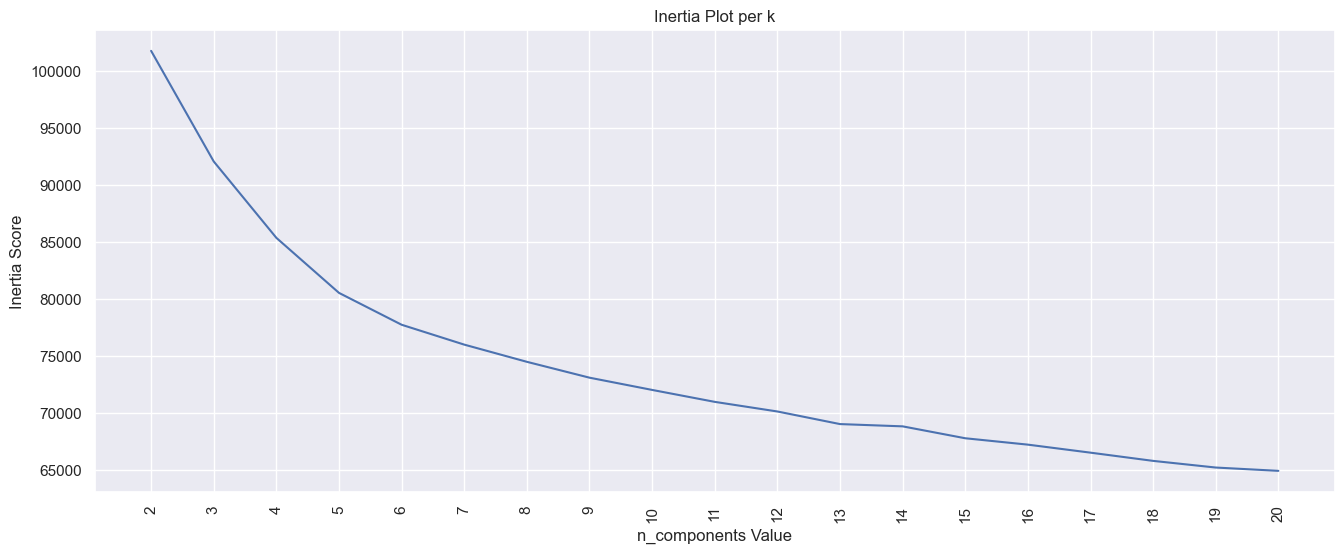

In [39]:
# Re - Running Kmeans on "new" data

X_train =new_customer_seg[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Running PCA on New Dataset after grouping

Explained variance ratio (first two components): [0.189838 0.083788]


<Figure size 800x600 with 0 Axes>

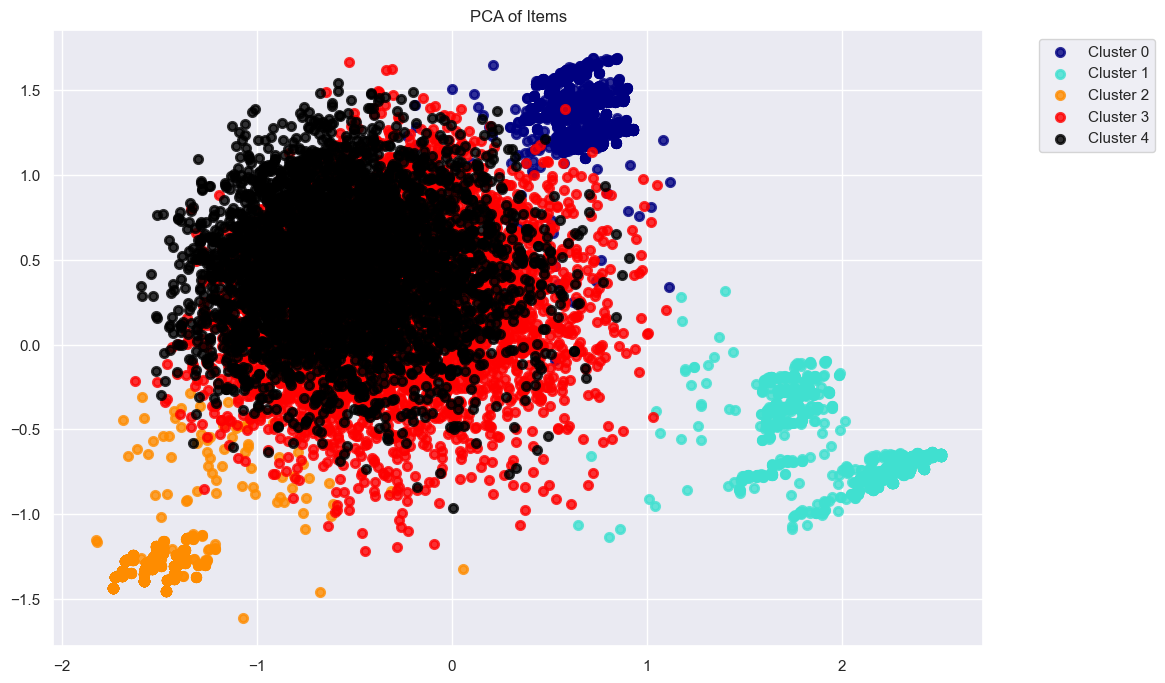

In [40]:

# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  8.138260182257717
The 95% variance we want to have is:  7.731347173144831

Variance explain with 30 n_compononets:  7.271758955052279
Variance explain with 35 n_compononets:  7.591171732448542
Variance explain with 36 n_compononets:  7.644306869709471
Variance explain with 40 n_compononets:  7.839897963784043
Variance explain with 41 n_compononets:  7.884275793990271
Variance explain with 50 n_compononets:  8.106935428402123


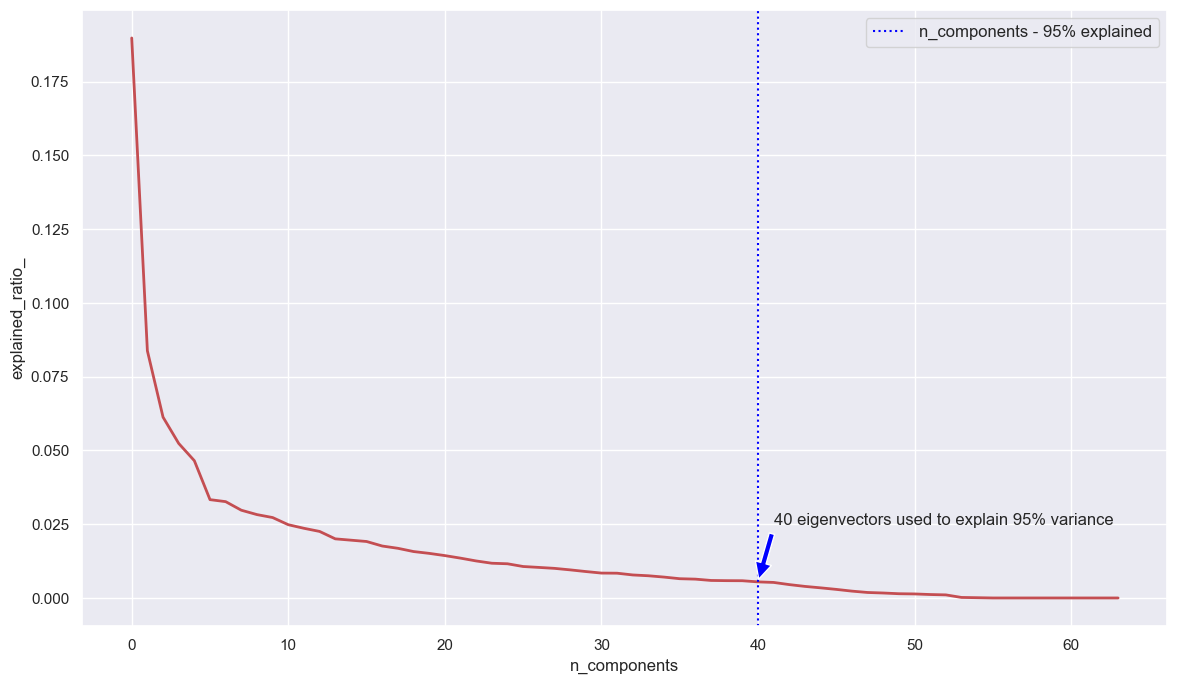

In [41]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(40,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('40 eigenvectors used to explain 95% variance', xy=(40, pca.explained_variance_ratio_[40]), xytext=(41, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 97357.32266283804
The innertia for : 3 Clusters is: 87646.8051685635
The innertia for : 4 Clusters is: 80959.06122172537
The innertia for : 5 Clusters is: 76130.67478596309
The innertia for : 6 Clusters is: 74074.17025421369
The innertia for : 7 Clusters is: 71678.25053276194
The innertia for : 8 Clusters is: 70098.71058604067
The innertia for : 9 Clusters is: 68687.60825182861
The innertia for : 10 Clusters is: 67342.08690465878
The innertia for : 11 Clusters is: 66404.77477221636
The innertia for : 12 Clusters is: 65335.813033078324
The innertia for : 13 Clusters is: 64881.53451558557
The innertia for : 14 Clusters is: 64432.18706975206
The innertia for : 15 Clusters is: 63253.25326808315
The innertia for : 16 Clusters is: 62925.467144019225
The innertia for : 17 Clusters is: 62674.875819324996
The innertia for : 18 Clusters is: 61495.07639022138
The innertia for : 19 Clusters is: 61063.02658273936
The innertia for : 20 Clusters is: 60566.47069878874

Text(0.5, 1.0, 'Inertia Plot per k')

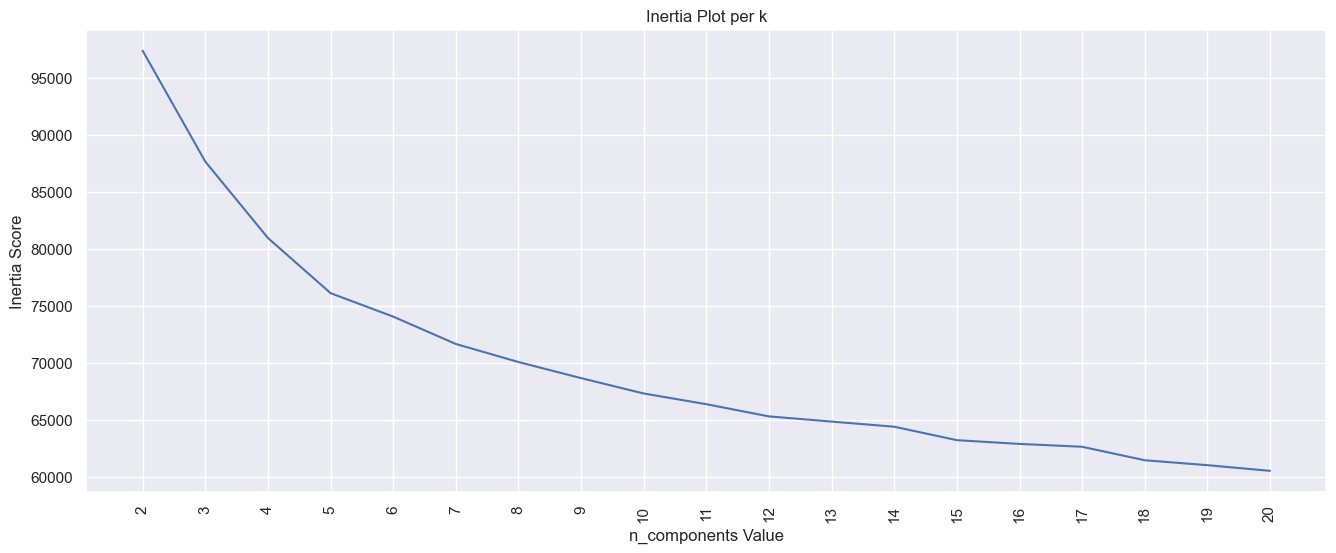

In [42]:
# Running PCA again

pca = PCA(n_components=40, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [43]:
new_customer_seg.to_csv('Cluster_Output.csv')